In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [106]:
data=pd.read_excel(r"C:\Users\sanka\Downloads\Compressed\Customer_retention_dataset-_2\Customer_retention_dataset\customer_retention_dataset.xlsx",sheet_name='datasheet')

In [107]:
#displaying all the columns in the dataset
pd. set_option("display.max_columns", None)

#displaying all the rows in the dataset
pd.set_option("display.max_rows",None)

In [108]:
data.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [109]:
data.tail()

1Gender of respondent 2 How old are you?   \
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
264                                    Mobile Internet         
265                                    Mobile Internet         
266                                    Mobile internet         
267                                              Wi-Fi         
268                                    Mobile Internet         

    8 Which device do you use to access the online shopping?  \
264                                         Smartphone         
265                                         Smartphone         
266                                             Laptop         
267                                         Smartphone         
268                                         Smartphone         

    9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
264                                         5.5 inches                                                     
265                                             Others                                                     
266                                             Others                                                     
267                                         5.5 inches                                                     
268                                         5.5 inches                                                     

    10 What is the operating system (OS) of your device?\t\t\t\t                                            \
264                                            Android                                                       
265                                            Android                                                       
266                              Window/windows Mobile                                                       
267                                            Android                                                       
268                                            Android                                                       

    11 What browser do you run on your device to access the website?\t\t\t                                                            \
264                                              Opera                               

Initial observations from the dataset

1.The dataset is consist of columns having only object data of some e commerce websites.

2.the column names are very big here, we need to rename the columns with small names for further analysis.

3.The dataset is consist of both numerical and catagorical data columns. We need to encoe the columns having catagorical data.

4.The dataset contains both utilitarian value and hedonistic values. These values effects the repeat purchase intention of the customers.

# Exploratory Data Analysis(EDA)

In [110]:
#finding number of rows and columns
data.shape

(269, 71)

The dataset has 269 rows and 71 columns.

In [111]:

#finding the null values in each column
data.isna().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

To get a more clear view about the null values, lets recheck the null values with the heatmap.

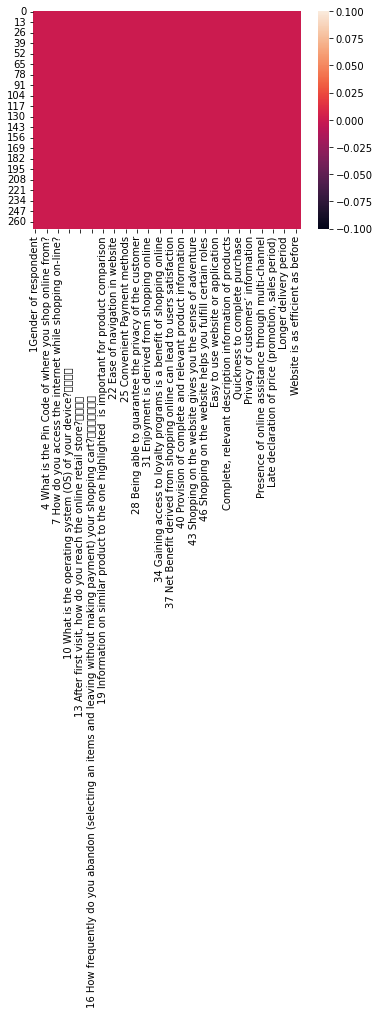

In [112]:
# Let's visualize the null values clearly
sns.heatmap(data.isna())
plt.show()

There are no null values present in the dataset

In [113]:
#no. of columns in the dataset
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

The column names are very big, lets shorten the titles of the columns with some proper names.

In [114]:
# Renaming the column names for better understanding
df1 = ['Gender','Age','Shopping_City','Pin_code','Shopping_Since','Shopping_Frequency','Internet_Accessibility','Device_Used',
           'Screen_Size','Operating_System', 'Browser_Used','Channel_First_Used','Login_Mode','Time_Explored','Payment_Mode','Abandon_Frequency',
          'Abandon_Reason','Content_Readability','Similar_Product_Info','Seller_Product_Info','Product_Info_Clarity','Navigation_Ease',
          'Loading_Processing_Speed','User_Friendly_Interface','Convenient_Payment_Mode','Timely_Fulfilment_Trust','Customer_Support_Response',
          'Customer_Privacy_Guarantee','Various_Channel_Responses','Benefits','Enjoy','Convenience','Return_Replacement_Policy','Loyalty_Programs_Access',
          'Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Product_Several_Category','Relevant_Product_Info','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Role_Fulfilment','Money_Worthy','Shopped_From','Easy_Web_App',
           'Visually_Appealing_WebApp','Product_Variety','Complete_Product_Info','Fast_WebApp','Reliable_WebApp','Quick_Purchase','Payment_Options_Availability',
           'Fast_Delivery','Customer_Privacy_Info','Financial_Security_Info','Perceived_Trustworthiness','Multichannel_Assistance','Long_Login_Time','Long_Display_Time',
           'Late_Price_Declare','Long_Loading_Time','Limited_Payment_Mode','Late_Delivery','WebApp_Design_Change','Page_Disruption','WebApp_Efficiency',
           'Recommendation']

data.columns = df1

In [115]:
#lets check if the column were renamed.
data.columns


Index(['Gender', 'Age', 'Shopping_City', 'Pin_code', 'Shopping_Since',
       'Shopping_Frequency', 'Internet_Accessibility', 'Device_Used',
       'Screen_Size', 'Operating_System', 'Browser_Used', 'Channel_First_Used',
       'Login_Mode', 'Time_Explored', 'Payment_Mode', 'Abandon_Frequency',
       'Abandon_Reason', 'Content_Readability', 'Similar_Product_Info',
       'Seller_Product_Info', 'Product_Info_Clarity', 'Navigation_Ease',
       'Loading_Processing_Speed', 'User_Friendly_Interface',
       'Convenient_Payment_Mode', 'Timely_Fulfilment_Trust',
       'Customer_Support_Response', 'Customer_Privacy_Guarantee',
       'Various_Channel_Responses', 'Benefits', 'Enjoy', 'Convenience',
       'Return_Replacement_Policy', 'Loyalty_Programs_Access',
       'Info_Satisfaction', 'Site_Quality_Satisfaction',
       'Net_Benefit_Satisfaction', 'Trust', 'Product_Several_Category',
       'Relevant_Product_Info', 'Monetary_Savings', 'Patronizing_Convenience',
       'Adventure_Sense', '

In [116]:
data.head()

Gender          Age  Shopping_City  Pin_code Shopping_Since  \
0    Male  31-40 years          Delhi    110009  Above 4 years   
1  Female  21-30 years          Delhi    110030  Above 4 years   
2  Female  21-30 years  Greater Noida    201308      3-4 years   
3    Male  21-30 years        Karnal     132001      3-4 years   
4  Female  21-30 years     Bangalore     530068      2-3 years   

   Shopping_Frequency Internet_Accessibility Device_Used Screen_Size  \
0         31-40 times                Dial-up     Desktop      Others   
1  41 times and above                  Wi-Fi  Smartphone  4.7 inches   
2  41 times and above        Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times        Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                  Wi-Fi  Smartphone  4.7 inches   

        Operating_System   Browser_Used Channel_First_Used       Login_Mode  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

       Time_Explored                        Payment_Mode Abandon_Frequency  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1  more than 15 mins                  Credit/Debit cards   Very frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3          6-10 mins                  Credit/Debit cards             Never   
4  more than 15 mins                  Credit/Debit cards        Frequently   

              Abandon_Reason Content_Readability Similar_Product_Info  \
0              Lack of trust           Agree (4)      Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)   Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)            Agree (4)   
3   Better alternative offer           Agree (4)            Agree (4)   
4   Better alternative offer  Strongly agree (5)      Indifferent (3)   

  Seller_Product_Info Product_Info_Clarity     Navigation_Ease  \
0     Indifferent (3)            Agree (4)           Agree (4)   
1  Strongly agree (5)   Strongly agree (5)  Strongly agree (5)   
2           Agree (4)            Agree (4)           Agree (4)   
3     Indifferent (3)            Agree (4)  Strongly agree (5)   
4     Indifferent (3)            Agree (4)           Agree (4)   

  Loading_Processing_Speed User_Friendly_Interface Convenient_Payment_Mode  \
0    Strongly disagree (1)           Dis-agree (2)           Dis-agree (2)   
1       Strongly agree (5)      Strongly agree (5)      Strongly agree (5)   
2                Agree (4)      Strongly agree (5)      Strongly agree (5)   
3                Agree (4)      Strongly agree (5)      Strongly agree (5)   
4       Strongly agree (5)      Strongly agree (5)      Strongly agree (5)   

  Timely_Fulfilment_Trust Customer_Support_Response  \
0            Disagree (2)        Strongly agree (5)   
1      Strongly agree (5)        Strongly agree (5)   
2      Strongly agree (5)        Strongly agree (5)   
3               Agree (4)        Strongly agree (5)   
4               Agree (4)        Strongly agree (5)   

  Customer_Privacy_Guarantee Various_Channel_Responses            Benefits  \
0                  Agree (4)                 Agree (4)     indifferent (3)   
1         Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2         Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
3         Strongly agree (5)                 Agree (4)           Agree (4)   
4                  Agree (4)        Strongly agree (5)  Strongly agree (5)   

                   Enjoy         Convenience Return_Replacement_Policy  \
0  Strongly disagree (1)       Dis-agree (2)      

Now as the columns were renamed with shorter names, lets check the dtatypes of every columns.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        269 non-null    object
 1   Age                           269 non-null    object
 2   Shopping_City                 269 non-null    object
 3   Pin_code                      269 non-null    int64 
 4   Shopping_Since                269 non-null    object
 5   Shopping_Frequency            269 non-null    object
 6   Internet_Accessibility        269 non-null    object
 7   Device_Used                   269 non-null    object
 8   Screen_Size                   269 non-null    object
 9   Operating_System              269 non-null    object
 10  Browser_Used                  269 non-null    object
 11  Channel_First_Used            269 non-null    object
 12  Login_Mode                    269 non-null    object
 13  Time_Explored       

The dataset only has one column having integer values and rest all the columns have object(string) values. We need to convert the object values into numbers for better analysis. also here it is proved again that the dataset has zero null values.

now lets check the number of unique values present in each columns for properly encoding the dataset.

In [118]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


Pin_code
count     269.000000
mean   220465.747212
std    140524.341051
min    110008.000000
25%    122018.000000
50%    201303.000000
75%    201310.000000
max    560037.000000

Observations from the statistics of the data

1.Pin_code is the only numerical column present in the dataset.

2.Its min value is 110008.0 and max value is 560037.0. even if  pincode column has numerical data, but those are only pincodes. so, we can not get anything from the mean and the standard deviation of the column.

In [119]:
# lets check the number of unique values in each column
data.nunique().to_frame("Unique values")

Unique values
Gender                                    2
Age                                       5
Shopping_City                            11
Pin_code                                 39
Shopping_Since                            5
Shopping_Frequency                        6
Internet_Accessibility                    4
Device_Used                               4
Screen_Size                               4
Operating_System                          3
Browser_Used                              4
Channel_First_Used                        3
Login_Mode                                5
Time_Explored                             5
Payment_Mode                              3
Abandon_Frequency                         4
Abandon_Reason                            5
Content_Readability                       4
Similar_Product_Info                      4
Seller_Product_Info                       5
Product_Info_Clarity                      4
Navigation_Ease                           4
Loading_Processing_Speed                  5
User_Friendly_Interface                   5
Convenient_Payment_Mode                   3
Timely_Fulfilment_Trust                   4
Customer_Support_Response                 4
Customer_Privacy_Guarantee                3
Various_Channel_Responses                 4
Benefits                                  5
Enjoy                                     5
Convenience                               4
Return_Replacement_Policy                 3
Loyalty_Programs_Access                   5
Info_Satisfaction                         3
Site_Quality_Satisfaction                 3
Net_Benefit_Satisfaction                  4
Trust                                     5
Product_Several_Category                  4
Relevant_Product_Info                     4
Monetary_Savings                          4
Patronizing_Convenience                   3
Adventure_Sense                           5
Social_Status                             5
Gratification                             5
Role_Fulfilment                           5
Money_Worthy                              3
Shopped_From                              9
Easy_Web_App                             10
Visually_Appealing_WebApp                10
Product_Variety                           9
Complete_Product_Info                    11
Fast_WebApp                              10
Reliable_WebApp                          10
Quick_Purchase                            9
Payment_Options_Availability             11
Fast_Delivery                             6
Customer_Privacy_Info                    11
Financial_Security_Info                  11
Perceived_Trustworthiness                 9
Multichannel_Assistance                  10
Long_Login_Time                          10
Long_Display_Time                        10
Late_Price_Declare                        8
Long_Loading_Time                        11
Limited_Payment_Mode                      8
Late_Delivery                             6
WebApp_Design_Change                      7
Page_Disruption                           8
WebApp_Efficiency                         8
Recommendation                            8

We have found out the number of unique values in each column , now lets find out the type of catagorical values in each column for selecting the proper encoding technique.

In [120]:
# lets check the value counts of each type in each column
for d in data.columns:
        print(data[d].value_counts())
        print('-'*200)

Female    181
Male       88
Name: Gender, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Shopping_City, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------

Observation after finding out the value counts.

1.In Shopping_Frequency column we have, 41 times and above having 47 values and 42 times and above having 6 values.They can be consider as one unit.

2.In Internet_Accessibility column we have, Mobile internet having 142 values and Mobile Internet having 47 values.They can be consider as one unit.




In [121]:
#replacing duplicate values

# Replacing duplicate values in  Shopping_Frequency column
data["Shopping_Frequency"]=data["Shopping_Frequency"].replace('42 times and above','41 times and above')

# Replacing duplicate values in  Internet_Accessibility column
data["Internet_Accessibility"]=data["Internet_Accessibility"].replace('Mobile internet','Mobile Internet')


In [122]:
data.Shopping_Frequency.value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     53
11-20 times            29
21-30 times            10
Name: Shopping_Frequency, dtype: int64

In [123]:
data.Internet_Accessibility.value_counts()

Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: Internet_Accessibility, dtype: int64

Now lets encode all the columns having catagorical values

In [124]:

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [125]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)



['Gender', 'Age', 'Shopping_City', 'Shopping_Since', 'Shopping_Frequency', 'Internet_Accessibility', 'Device_Used', 'Screen_Size', 'Operating_System', 'Browser_Used', 'Channel_First_Used', 'Login_Mode', 'Time_Explored', 'Payment_Mode', 'Abandon_Frequency', 'Abandon_Reason', 'Content_Readability', 'Similar_Product_Info', 'Seller_Product_Info', 'Product_Info_Clarity', 'Navigation_Ease', 'Loading_Processing_Speed', 'User_Friendly_Interface', 'Convenient_Payment_Mode', 'Timely_Fulfilment_Trust', 'Customer_Support_Response', 'Customer_Privacy_Guarantee', 'Various_Channel_Responses', 'Benefits', 'Enjoy', 'Convenience', 'Return_Replacement_Policy', 'Loyalty_Programs_Access', 'Info_Satisfaction', 'Site_Quality_Satisfaction', 'Net_Benefit_Satisfaction', 'Trust', 'Product_Several_Category', 'Relevant_Product_Info', 'Monetary_Savings', 'Patronizing_Convenience', 'Adventure_Sense', 'Social_Status', 'Gratification', 'Role_Fulfilment', 'Money_Worthy', 'Shopped_From', 'Easy_Web_App', 'Visually_Appeal

In [126]:
print("number of catagorical columns are ", len(categorical_col))

number of catagorical columns are  70


In [127]:
# now lets check for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Pin_code']


In [128]:
#encoding the catagorical columns.
data[categorical_col]=data[categorical_col].apply(lab_enc.fit_transform)
data[categorical_col]


Gender  Age  Shopping_City  Shopping_Since  Shopping_Frequency  \
0         1    1              2               3                   2   
1         0    0              2               3                   3   
2         0    0              4               2                   3   
3         1    0              6               2                   4   
4         0    0              0               1                   0   
5         0    1              9               3                   3   
6         1    2              2               3                   2   
7         1    2              2               2                   4   
8         0    4             10               1                   4   
9         0    1              2               4                   4   
10        1    1              8               3                   1   
11        0    2              9               3                   4   
12        0    3              5               1                   4   
13        0    1              4               3                   0   
14        0    0              6               4                   3   
15        0    0              0               1                   3   
16        1    1              9               0                   1   
17        1    2              2               4                   4   
18        0    2              2               0                   4   
19        0    0             10               0                   0   
20        0    0              9               0                   3   
21        1    1              5               2                   2   
22        1    2              4               3                   2   
23        0    2              4               3                   3   
24        0    0              7               2                   3   
25        0    0              0               1                   4   
26        1    0              3               4                   0   
27        1    1              2               3                   3   
28        0    2              4               3                   2   
29        0    2              6               1                   4   
30        0    4              0               3                   4   
31        1    1              9               1                   4   
32        1    1              2               3                   1   
33        0    2              4               3                   4   
34        0    3              6               2                   4   
35        0    0              0               1                   0   
36        1    1              9               4                   4   
37        1    2              2               3                   0   
38        0    2              4               3                   3   
39        0    0              6               1                   2   
40        0    0              0               3                   2   
41        1    1              9               2                   3   
42        1    0              2               1                   3   
43        0    0              4               4                   4   
44        0    1              7               3                   0   
45        0    2              0               3                   3   
46        1    2              9               3                   2   
47        1    4              2               3                   4   
48        0    1              4               1                   4   
49        0    1              6               3                   3   
50        0    2              0               2                   2   
51        1    3              9               1                   2   
52        1    2              2               4                   3   
53        0    2              4               3                   3   
54        0    0              7               3                   4   
55        0    0             

In [129]:
data.shape

(269, 71)

lets check if  all the catagorical columns are encoded


In [130]:
data.head()

Gender  Age  Shopping_City  Pin_code  Shopping_Since  Shopping_Frequency  \
0       1    1              2    110009               3                   2   
1       0    0              2    110030               3                   3   
2       0    0              4    201308               2                   3   
3       1    0              6    132001               2                   4   
4       0    0              0    530068               1                   0   

   Internet_Accessibility  Device_Used  Screen_Size  Operating_System  \
0                       0            0            3                 2   
1                       2            2            0                 1   
2                       1            2            2                 0   
3                       1            2            2                 1   
4                       2            2            0                 1   

   Browser_Used  Channel_First_Used  Login_Mode  Time_Explored  Payment_Mode  \
0             0                   2           2              2             2   
1             0                   2           4              4             1   
2             0                   2           4              1             2   
3             3                   2           2              2             1   
4             3                   0           4              4             1   

   Abandon_Frequency  Abandon_Reason  Content_Readability  \
0                  2               2                    0   
1                  3               4                    2   
2                  2               4                    2   
3                  1               0                    0   
4                  0               0                    2   

   Similar_Product_Info  Seller_Product_Info  Product_Info_Clarity  \
0                     2                    2                     0   
1                     3                    3                     2   
2                     0                    0                     0   
3                     0                    2                     0   
4                     2                    2                     0   

   Navigation_Ease  Loading_Processing_Speed  User_Friendly_Interface  \
0                0                         4                        1   
1                2                         3                        3   
2                0                         0                        3   
3                2                         0                        3   
4                0                         3                        3   

   Convenient_Payment_Mode  Timely_Fulfilment_Trust  \
0                        1                        1   
1                        2                        2   
2                        2                        2   
3                        2                        0   
4                        2                        0   

   Customer_Support_Response  Customer_Privacy_Guarantee  \
0                          1                           0   
1                          1                           1   
2                          1                           1   
3                          1                           1   
4                          1                           0   

   Various_Channel_Responses  Benefits  Enjoy  Convenience  \
0                          0         4      3            1   
1                          1         2      2            2   
2                          1         2      2            2   
3                          0         0      4            3   
4                          1         2      2            2   

   Return_Replacement_Policy  Loyalty_Programs_Access  Info_Satisfaction  \
0                          1                        0                  2   
1                          2                        2                  1   
2                          2                        2                  1   
3           

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Gender                        269 non-null    int32
 1   Age                           269 non-null    int32
 2   Shopping_City                 269 non-null    int32
 3   Pin_code                      269 non-null    int64
 4   Shopping_Since                269 non-null    int32
 5   Shopping_Frequency            269 non-null    int32
 6   Internet_Accessibility        269 non-null    int32
 7   Device_Used                   269 non-null    int32
 8   Screen_Size                   269 non-null    int32
 9   Operating_System              269 non-null    int32
 10  Browser_Used                  269 non-null    int32
 11  Channel_First_Used            269 non-null    int32
 12  Login_Mode                    269 non-null    int32
 13  Time_Explored                 269 n

all the catagorical columns are encoded properly into numerical values.so now we can visualize the data.

# Visualization

In [132]:
def value_counts(column):
    counts=len(data[column].value_counts())
    if counts<5:
        plt.figure(figsize=(5,5))
    elif counts<10:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=data)
    plt.show()
    print("*"*200)

0    181
1     88
Name: Gender, dtype: int64


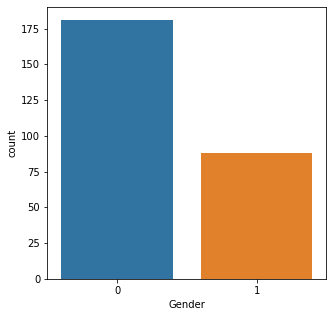

********************************************************************************************************************************************************************************************************
1    81
0    79
2    70
4    20
3    19
Name: Age, dtype: int64


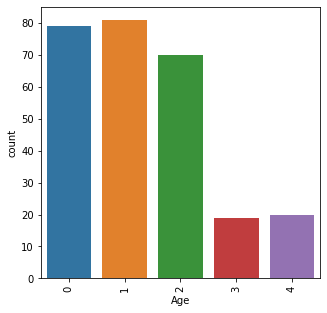

********************************************************************************************************************************************************************************************************
2     58
4     43
9     40
0     37
6     27
10    18
3     18
5     12
7      9
8      5
1      2
Name: Shopping_City, dtype: int64


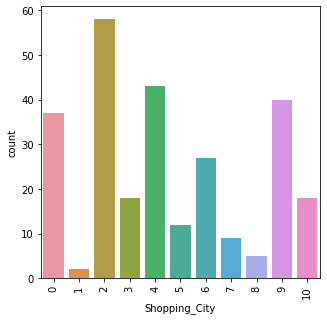

********************************************************************************************************************************************************************************************************
3    98
1    65
2    47
4    43
0    16
Name: Shopping_Since, dtype: int64


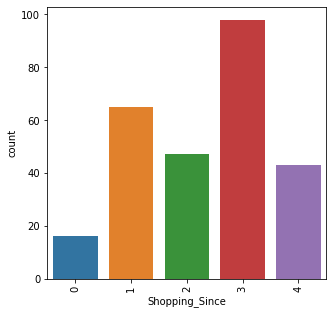

********************************************************************************************************************************************************************************************************
4    114
2     63
3     53
0     29
1     10
Name: Shopping_Frequency, dtype: int64


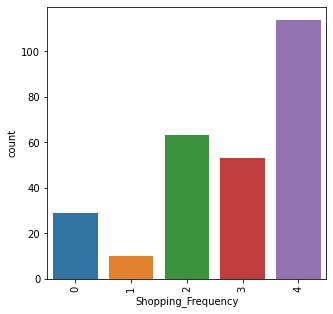

********************************************************************************************************************************************************************************************************
1    189
2     76
0      4
Name: Internet_Accessibility, dtype: int64


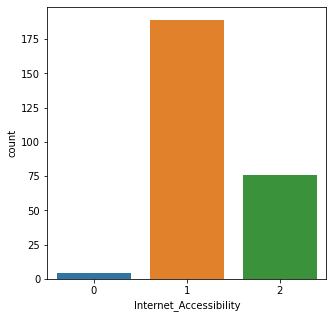

********************************************************************************************************************************************************************************************************
2    141
1     86
0     30
3     12
Name: Device_Used, dtype: int64


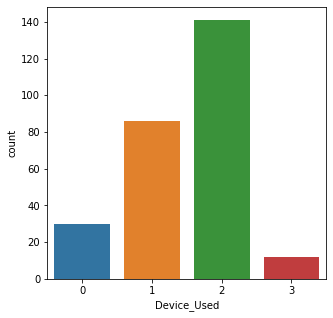

********************************************************************************************************************************************************************************************************
3    134
2     99
0     29
1      7
Name: Screen_Size, dtype: int64


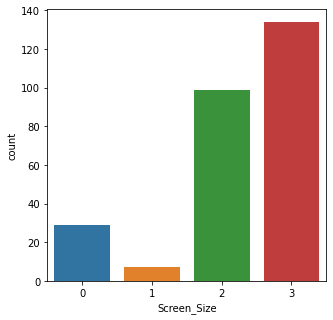

********************************************************************************************************************************************************************************************************
0    216
3     40
2      8
1      5
Name: Browser_Used, dtype: int64


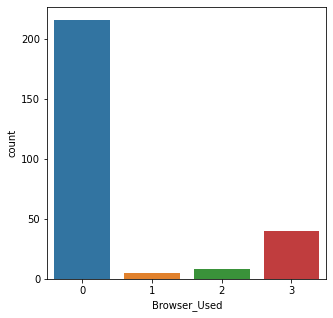

********************************************************************************************************************************************************************************************************
2    87
4    86
0    70
1    18
3     8
Name: Login_Mode, dtype: int64


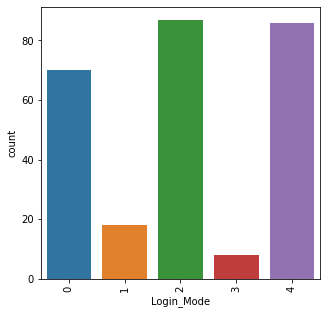

********************************************************************************************************************************************************************************************************
4    123
2     71
1     46
3     15
0     14
Name: Time_Explored, dtype: int64


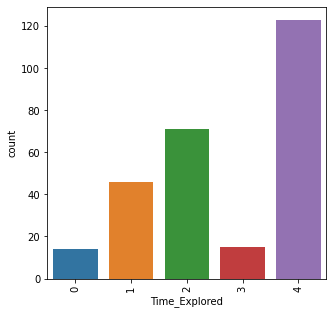

********************************************************************************************************************************************************************************************************
2    171
1     48
0     35
3     15
Name: Abandon_Frequency, dtype: int64


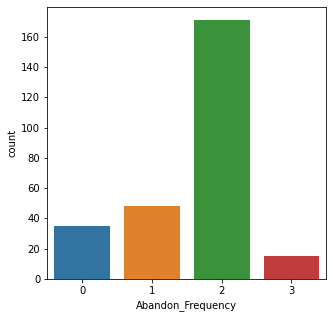

********************************************************************************************************************************************************************************************************
0    133
4     54
1     37
2     31
3     14
Name: Abandon_Reason, dtype: int64


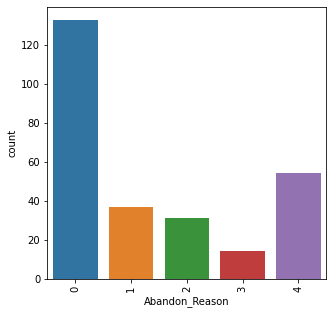

********************************************************************************************************************************************************************************************************
2    164
0     80
3     18
1      7
Name: Content_Readability, dtype: int64


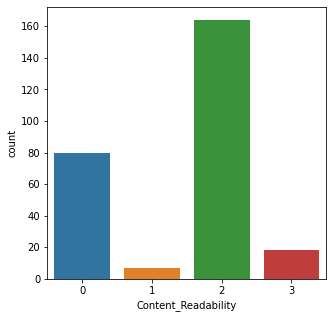

********************************************************************************************************************************************************************************************************
3    116
0     92
2     43
1     18
Name: Similar_Product_Info, dtype: int64


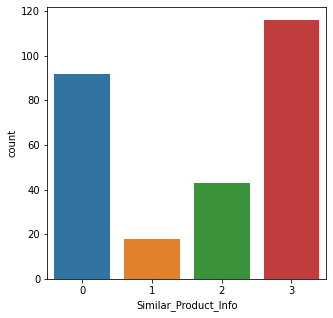

********************************************************************************************************************************************************************************************************
0    101
3     87
2     52
1     18
4     11
Name: Seller_Product_Info, dtype: int64


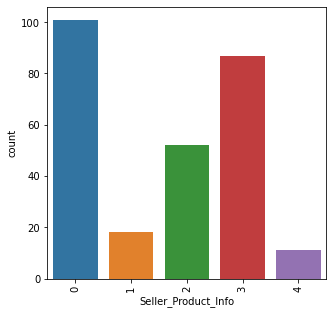

********************************************************************************************************************************************************************************************************
0    132
2    107
3     18
1     12
Name: Product_Info_Clarity, dtype: int64


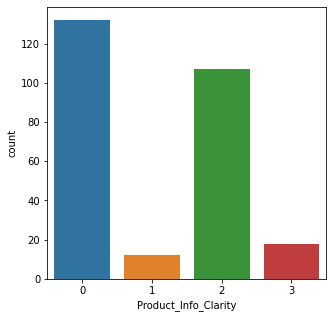

********************************************************************************************************************************************************************************************************
2    141
0    105
3     18
1      5
Name: Navigation_Ease, dtype: int64


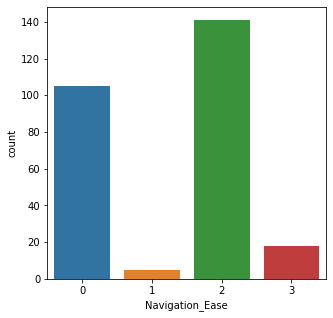

********************************************************************************************************************************************************************************************************
3    115
0    112
1     18
4     12
2     12
Name: Loading_Processing_Speed, dtype: int64


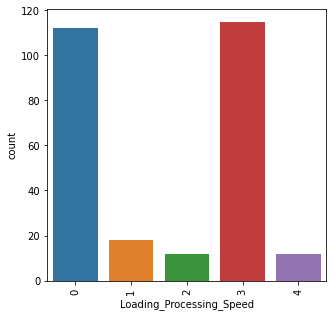

********************************************************************************************************************************************************************************************************
3    189
0     45
4     18
1     12
2      5
Name: User_Friendly_Interface, dtype: int64


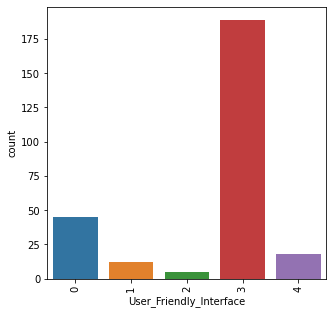

********************************************************************************************************************************************************************************************************
2    159
0     80
1     30
Name: Convenient_Payment_Mode, dtype: int64


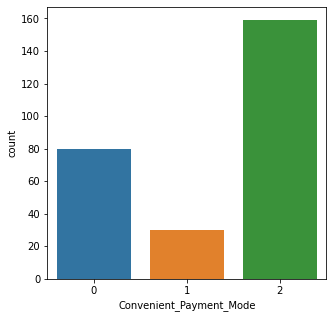

********************************************************************************************************************************************************************************************************
2    141
0     86
1     30
3     12
Name: Timely_Fulfilment_Trust, dtype: int64


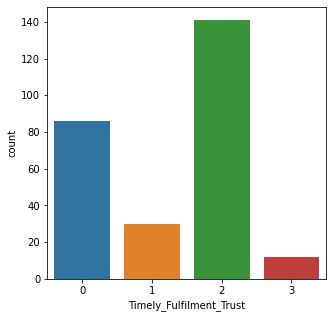

********************************************************************************************************************************************************************************************************
1    194
0     42
2     18
3     15
Name: Customer_Support_Response, dtype: int64


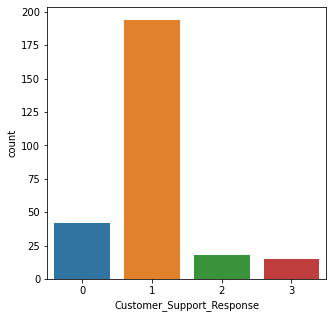

********************************************************************************************************************************************************************************************************
1    185
0     58
2     26
Name: Customer_Privacy_Guarantee, dtype: int64


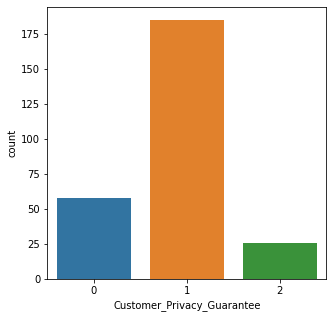

********************************************************************************************************************************************************************************************************
1    149
0     94
3     15
2     11
Name: Various_Channel_Responses, dtype: int64


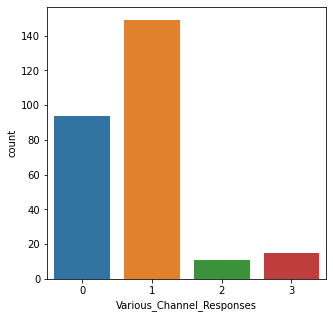

********************************************************************************************************************************************************************************************************
2    105
0     85
4     50
3     18
1     11
Name: Benefits, dtype: int64


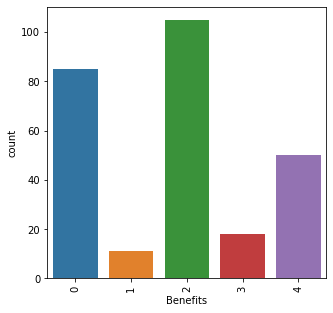

********************************************************************************************************************************************************************************************************
2    86
4    75
0    59
3    30
1    19
Name: Enjoy, dtype: int64


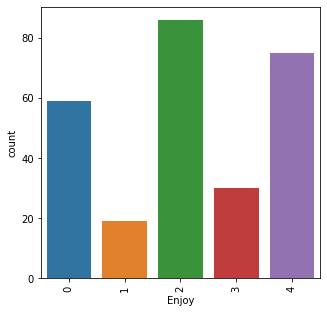

********************************************************************************************************************************************************************************************************
2    146
0     78
3     33
1     12
Name: Convenience, dtype: int64


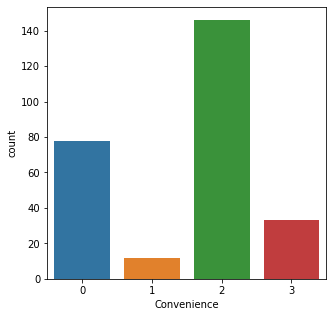

********************************************************************************************************************************************************************************************************
2    198
0     51
1     20
Name: Return_Replacement_Policy, dtype: int64


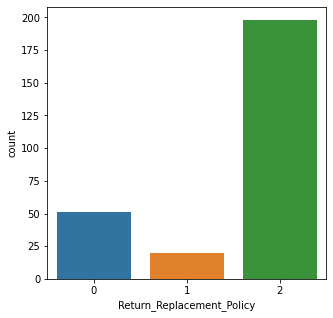

********************************************************************************************************************************************************************************************************
2    115
0     64
4     64
1     15
3     11
Name: Loyalty_Programs_Access, dtype: int64


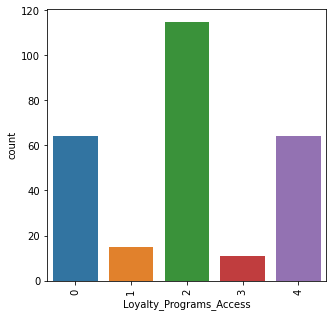

********************************************************************************************************************************************************************************************************
1    133
0     80
2     56
Name: Info_Satisfaction, dtype: int64


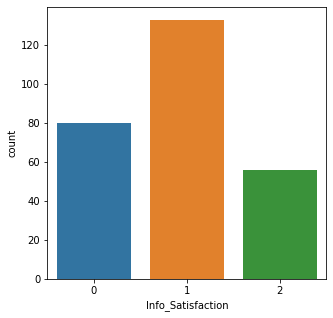

********************************************************************************************************************************************************************************************************
2    175
0     86
1      8
Name: Site_Quality_Satisfaction, dtype: int64


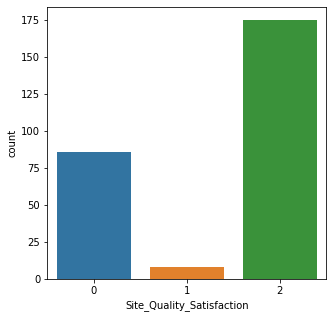

********************************************************************************************************************************************************************************************************
2    164
0     54
3     40
1     11
Name: Net_Benefit_Satisfaction, dtype: int64


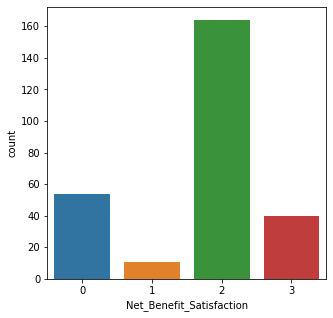

********************************************************************************************************************************************************************************************************
2    122
0    117
3     18
1      7
4      5
Name: Trust, dtype: int64


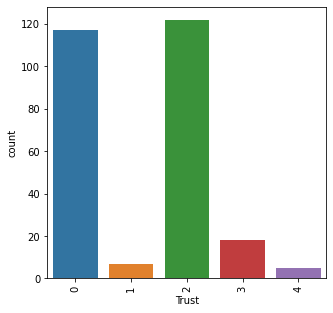

********************************************************************************************************************************************************************************************************
2    111
0     94
3     57
1      7
Name: Product_Several_Category, dtype: int64


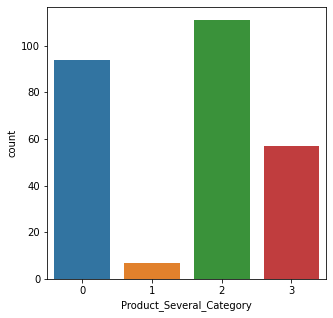

********************************************************************************************************************************************************************************************************
2    135
0     98
3     31
1      5
Name: Relevant_Product_Info, dtype: int64


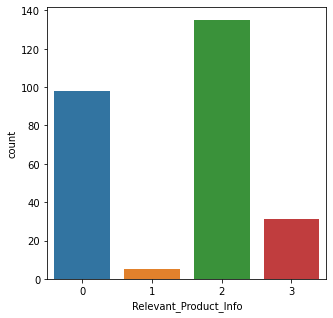

********************************************************************************************************************************************************************************************************
2    148
0     75
1     31
3     15
Name: Monetary_Savings, dtype: int64


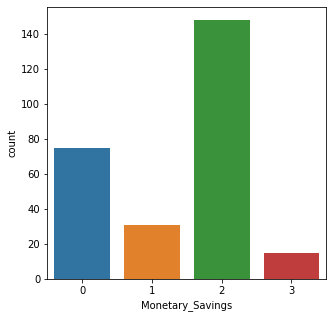

********************************************************************************************************************************************************************************************************
0    138
2     77
1     54
Name: Patronizing_Convenience, dtype: int64


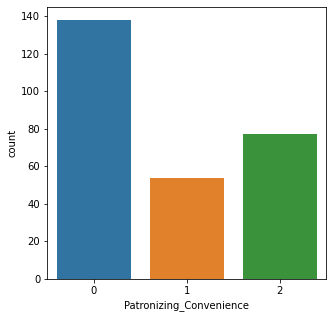

********************************************************************************************************************************************************************************************************
0    101
4     59
2     54
1     50
3      5
Name: Adventure_Sense, dtype: int64


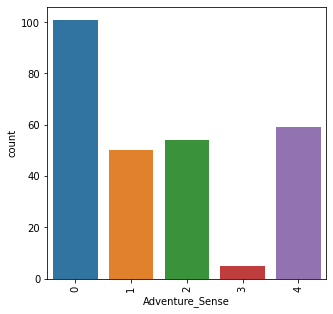

********************************************************************************************************************************************************************************************************
4    100
0     59
2     48
3     33
1     29
Name: Social_Status, dtype: int64


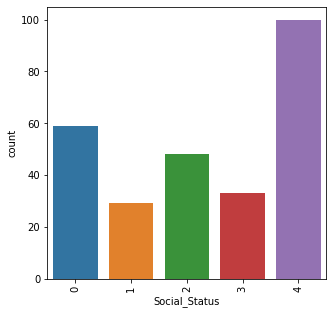

********************************************************************************************************************************************************************************************************
4    101
2     65
0     63
1     22
3     18
Name: Gratification, dtype: int64


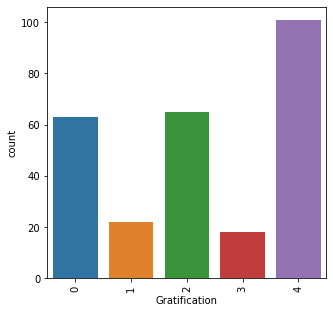

********************************************************************************************************************************************************************************************************
0    88
4    88
2    38
3    33
1    22
Name: Role_Fulfilment, dtype: int64


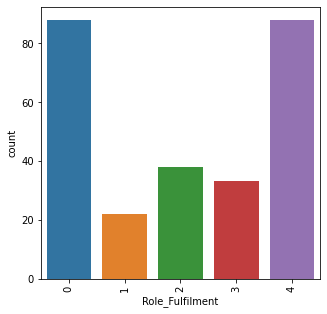

********************************************************************************************************************************************************************************************************
0    149
1     82
2     38
Name: Money_Worthy, dtype: int64


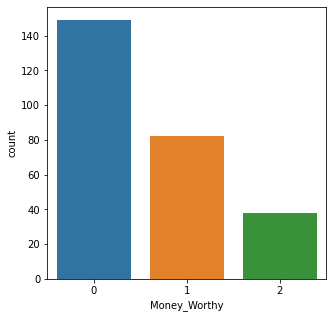

********************************************************************************************************************************************************************************************************
4    82
2    44
1    32
5    29
6    27
8    20
0    16
7    12
3     7
Name: Shopped_From, dtype: int64


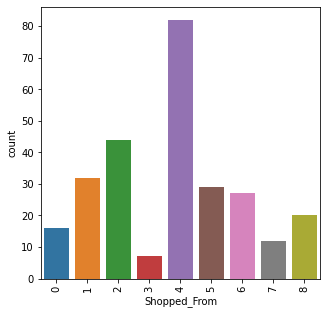

********************************************************************************************************************************************************************************************************
4    64
3    44
1    44
0    29
5    22
7    20
2    19
9    12
8     8
6     7
Name: Easy_Web_App, dtype: int64


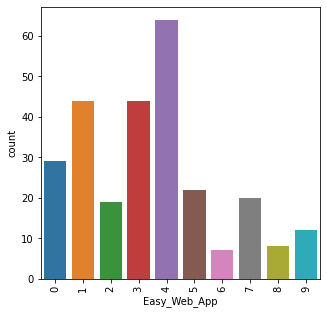

********************************************************************************************************************************************************************************************************
1    87
0    44
3    36
6    20
5    15
9    15
8    15
2    14
7    12
4    11
Name: Visually_Appealing_WebApp, dtype: int64


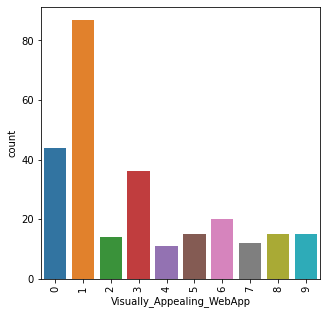

********************************************************************************************************************************************************************************************************
1    130
0     43
4     20
6     15
7     15
2     14
3     13
5     12
8      7
Name: Product_Variety, dtype: int64


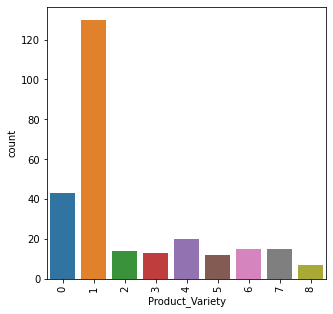

********************************************************************************************************************************************************************************************************
1     100
0      43
4      24
7      20
2      15
5      15
3      14
10     12
9      11
8       8
6       7
Name: Complete_Product_Info, dtype: int64


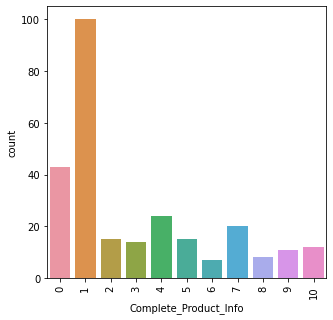

********************************************************************************************************************************************************************************************************
0    51
7    44
2    30
5    30
1    30
6    25
4    25
3    14
9    12
8     8
Name: Fast_WebApp, dtype: int64


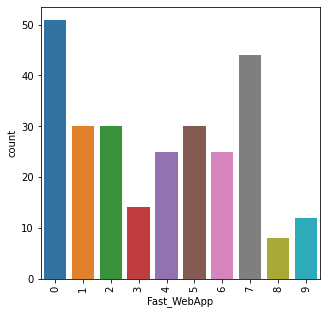

********************************************************************************************************************************************************************************************************
0    61
1    50
3    36
6    35
5    18
8    15
7    15
2    14
4    13
9    12
Name: Reliable_WebApp, dtype: int64


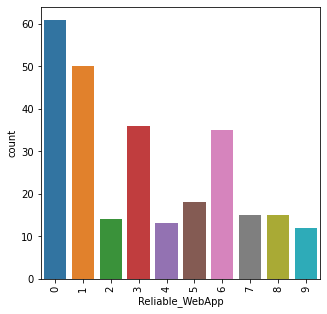

********************************************************************************************************************************************************************************************************
0    66
3    47
1    37
2    30
8    25
5    20
4    15
6    15
7    14
Name: Quick_Purchase, dtype: int64


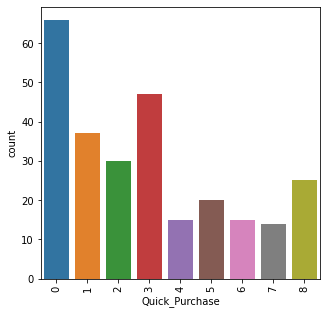

********************************************************************************************************************************************************************************************************
1     65
2     40
4     39
0     23
10    20
3     19
5     18
8     14
9     12
6     11
7      8
Name: Payment_Options_Availability, dtype: int64


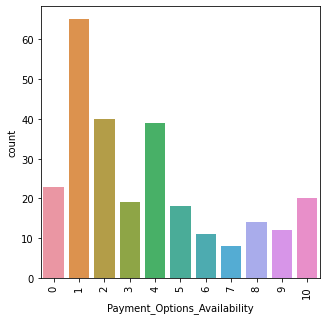

********************************************************************************************************************************************************************************************************
0    107
1     82
3     36
2     15
4     15
5     14
Name: Fast_Delivery, dtype: int64


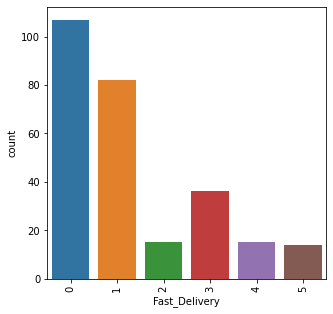

********************************************************************************************************************************************************************************************************
0     71
1     54
2     25
5     24
10    18
9     15
7     15
8     15
3     14
4     11
6      7
Name: Customer_Privacy_Info, dtype: int64


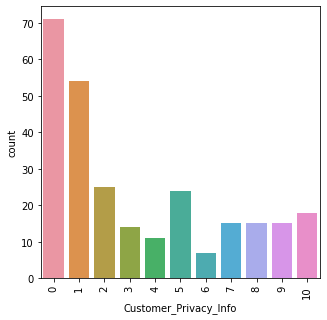

********************************************************************************************************************************************************************************************************
0     51
4     42
8     33
5     25
1     24
6     20
7     19
9     15
10    15
2     14
3     11
Name: Financial_Security_Info, dtype: int64


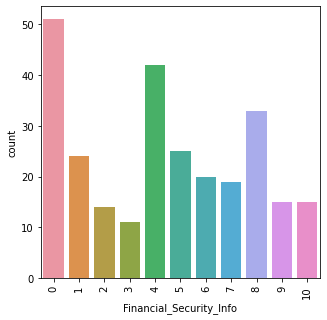

********************************************************************************************************************************************************************************************************
0    76
5    36
6    35
1    31
7    27
2    25
8    15
4    13
3    11
Name: Perceived_Trustworthiness, dtype: int64


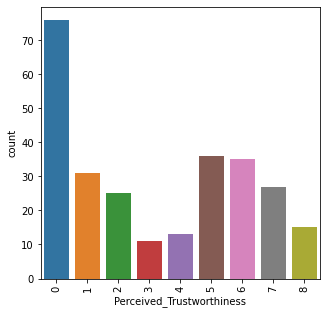

********************************************************************************************************************************************************************************************************
3    61
0    60
1    39
6    26
8    20
2    15
5    15
4    13
9    12
7     8
Name: Multichannel_Assistance, dtype: int64


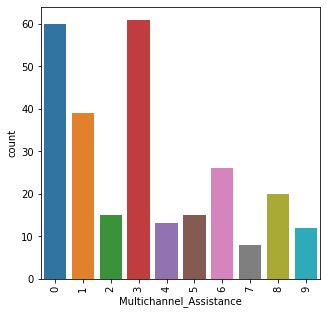

********************************************************************************************************************************************************************************************************
0    57
1    38
8    38
7    35
2    29
9    25
5    15
6    13
3    11
4     8
Name: Long_Login_Time, dtype: int64


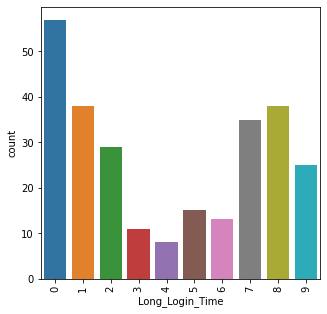

********************************************************************************************************************************************************************************************************
1    60
0    39
6    35
9    34
7    25
5    19
8    15
4    15
2    14
3    13
Name: Long_Display_Time, dtype: int64


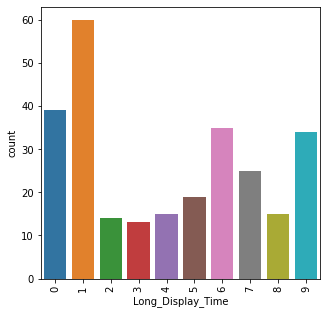

********************************************************************************************************************************************************************************************************
4    75
5    52
7    41
3    38
0    38
2    13
6     7
1     5
Name: Late_Price_Declare, dtype: int64


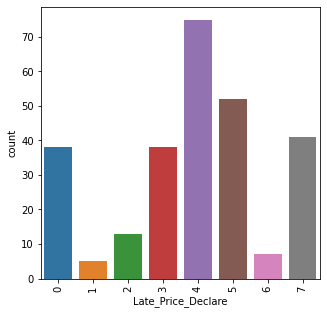

********************************************************************************************************************************************************************************************************
7     61
8     59
5     32
10    23
1     18
0     16
9     15
4     14
2     13
6     11
3      7
Name: Long_Loading_Time, dtype: int64


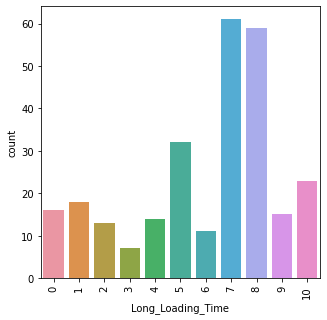

********************************************************************************************************************************************************************************************************
7    87
0    62
3    31
1    29
5    25
6    15
2    13
4     7
Name: Limited_Payment_Mode, dtype: int64


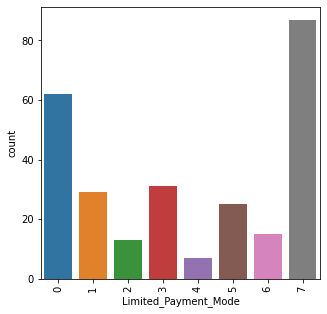

********************************************************************************************************************************************************************************************************
3    72
5    64
1    44
0    37
4    26
2    26
Name: Late_Delivery, dtype: int64


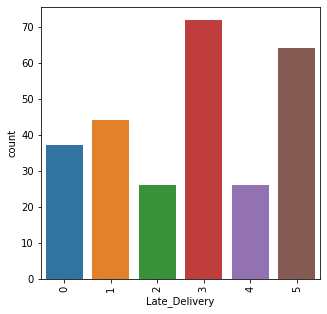

********************************************************************************************************************************************************************************************************
0    96
5    63
1    45
4    30
2    20
6     8
3     7
Name: WebApp_Design_Change, dtype: int64


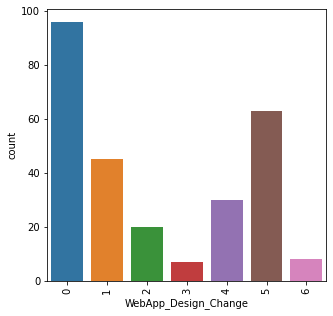

********************************************************************************************************************************************************************************************************
0    53
4    52
7    49
6    39
2    26
1    25
5    14
3    11
Name: Page_Disruption, dtype: int64


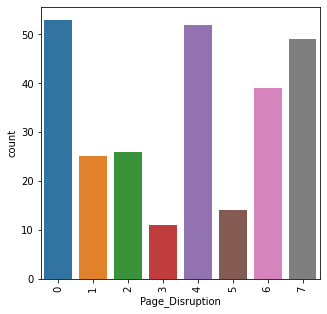

********************************************************************************************************************************************************************************************************
0    94
4    47
1    45
2    25
3    18
6    15
5    14
7    11
Name: WebApp_Efficiency, dtype: int64


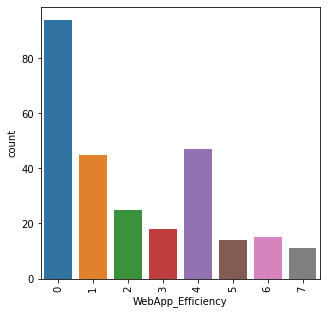

********************************************************************************************************************************************************************************************************
0    79
1    62
6    39
3    30
5    20
2    15
4    13
7    11
Name: Recommendation, dtype: int64


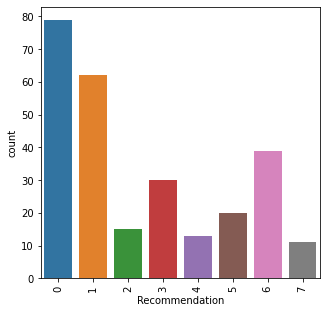

********************************************************************************************************************************************************************************************************


In [133]:
CR1=data.iloc[:,[0,1,2,4,5,6,7,8,10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
for i in CR1:
    print(CR1[i].value_counts())
    value_counts(i)

Observations from the countplots

There were more female customers than male customers.

People in age group od 21 to 30 years are more active on e commerce sites.

Most of the customers from the city Delhi, Greater Noida, Noida and Bangalore are used to shop onine and the shopping count is high in these cities.

Most of the customers found shopping online for more than 4 years and the count is high for the same.

In last 1 year, most of the customers started purchasing online. 

Most of the customers used Smartphone device to access the online shopping. 

The count is high for others mobile screen size. 

Most of the customers used Google chrome to access the website.

Most of the customers used Search Engine and Via application to reach the online retail store.

Many customers took more than 15 mins before making the purchase decision. 

Around 133 customers abandoned their bag due to some better alternative offer. 
	
Around 77% of the customers agreed that the information on similar product to the one highlighted is important for product comparison.

About 70% of the customers agreed that complete information on listed seller and product being offered is important for purchase decision.

88.84% of the customers agreed that all relevant information on listed products must be stated clearly and only 11% of the customers disagreed with it.

91% of the customers agreed that ease of navigation in website helps them more.

Most of the customers agreed that they have no issues with the loading and processing speed.

87% of the customers agreed with user friendly website interface. 

84% of the customers trusted that the online retail store will fulfill its part of the transaction at the stipulated time.

83% of the customers agreed that shopping online is convenient and flexible and 12% of the customers are indifferent which means either they are agreed to this or disagreed and only 5% of the customers completely disagreed with it.

Most of the customers agreed to offering a wide variety of listed product in several category and the count is high for the same.

Around 86% of the customers would like to have provision of complete and relevant product information in the online shopping website.

47% of the customers agreed that shopping on the website helps them fulfilling certain roles and 33% of the customers are in confusion whether to agree or disagree and only 20% of the customers disagrees with it.

Most of the people shopped from Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com companies and they think that it is easy to use website or applicatiion in these companies.

Amazon.in and Flipkart.com have high visual appealing web-page layout compared to others.

48% of the customers says that amazon and flipkart shows wide variety of products in their shopping websited compared to other websites. 

37% of the customers liked amazon and flipkart in displaying complete and relevant information of the products.

Around 51 customers says that Amazon.in is the fast loading website and application and they liked it. 

The count is high for amazon followed by amazon and flipkart which means most of the customers liked the reliability of website or application in amazon and flipkart.

Most of the customers likes Amazon's quickness to complete the purchase followed by Flipart's and only few of the customers likes Myntra website.

In Amazon and flipkart websites there are several payment options available compared to the other shopping websites.

Most of the customers liked Amazon's delivery speed.

Most of the customers trusts amazon followed by flipkart in terms of keeping the privacy of their data information

The count is high for the customers who belives that amazon website keeps their finanacial information secret. 

Most of the customers believed that Amazon has perceived trustworthiness comapared to others. 

Most of the customers like Amazon inerms of presence of online assistance through multi-channel followed by flipkart,Myntra and snapdeal.

Most of the customers agreed that Amazon takes longer time to get logged them in.

Customers believes that Amazon and flipkart takes longer time in display the graphics and photos in sales period.

Customers says that Myntra and paytm have late declaration of price in promotion/sales period compared to others.

Also Myntra and paytm takes longer page loading time.

Snapdeal.com has limited mode of payment on most products followed by Amazon.in.

In terms of time taken in product delivery Paytm has highest count followed by Snapdeal.com.

Most of the customers disliked change in website/Application design on amazon followed by paytm.

Most of the customers disliked frequent disruption when moving from one page to another on amazon, Myntra and snapdeal.

Most of the customers believes that Amazon and flipkart website are as efficient as before.

Most of the customers would like to recommend amazon site to a friend.


Now lets plot some more plots among the different features to have a better understanding about the dataset

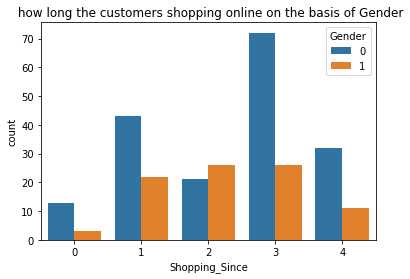

In [134]:

plt.title(' how long the customers shopping online on the basis of Gender')
sns.countplot(data['Shopping_Since'],hue=data['Gender']);




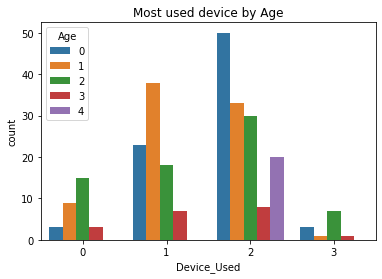

In [135]:
plt.title('Most used device by Age')
sns.countplot(data['Device_Used'],hue=data['Age']);


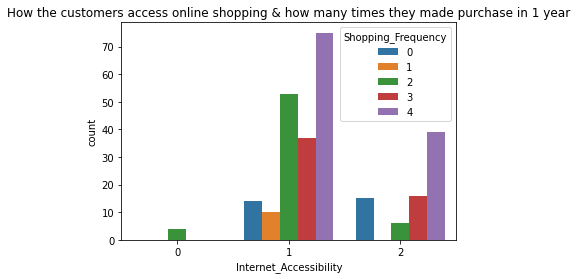

In [136]:
plt.title('How the customers access online shopping & how many times they made purchase in 1 year')
sns.countplot(data['Internet_Accessibility'],hue=data['Shopping_Frequency']);


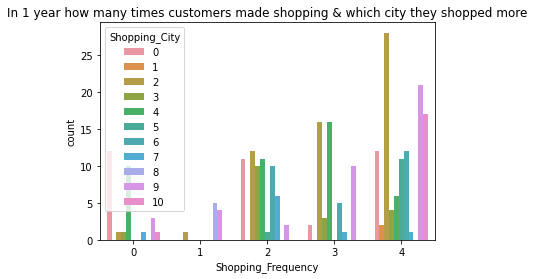

In [137]:
plt.title('In 1 year how many times customers made shopping & which city they shopped more')
sns.countplot(data['Shopping_Frequency'],hue=data['Shopping_City']);

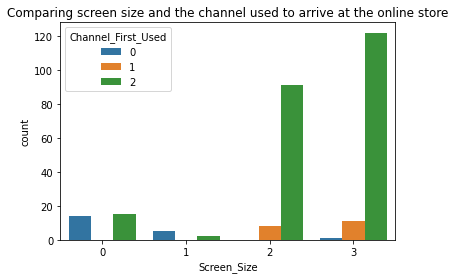

In [138]:
plt.title('Comparing screen size and the channel used to arrive at the online store',fontsize=12)
sns.countplot(data['Screen_Size'],hue=data['Channel_First_Used']);



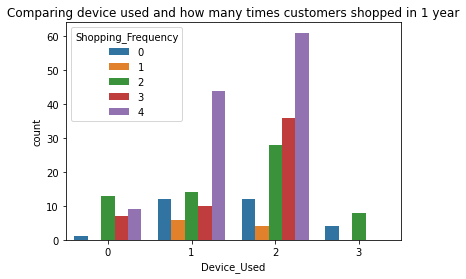

In [139]:
plt.title('Comparing device used and how many times customers shopped in 1 year',fontsize=12)
sns.countplot(data['Device_Used'],hue=data['Shopping_Frequency']);



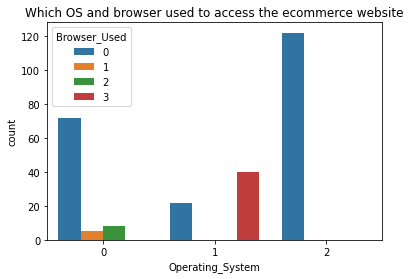

In [140]:
plt.title('Which OS and browser used to access the ecommerce website',fontsize=12)
sns.countplot(data['Operating_System'],hue=data['Browser_Used']);



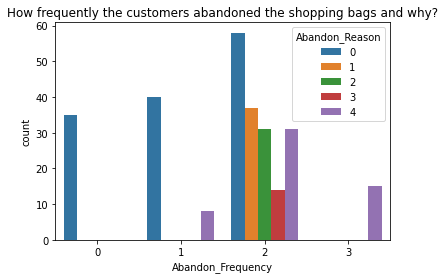

In [141]:
plt.title('How frequently the customers abandoned the shopping bags and why?',fontsize=12)
sns.countplot(data['Abandon_Frequency'],hue=data['Abandon_Reason']);

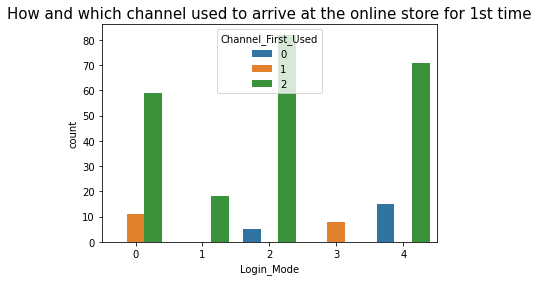

In [142]:
plt.title('How and which channel used to arrive at the online store for 1st time',fontsize=15)
sns.countplot('Login_Mode',hue='Channel_First_Used',data=data);


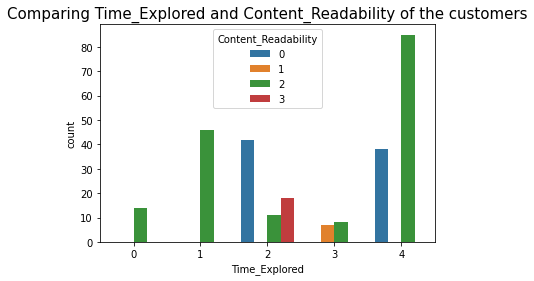

In [143]:
plt.title('Comparing Time_Explored and Content_Readability of the customers',fontsize=15)
sns.countplot('Time_Explored',hue='Content_Readability',data=data);


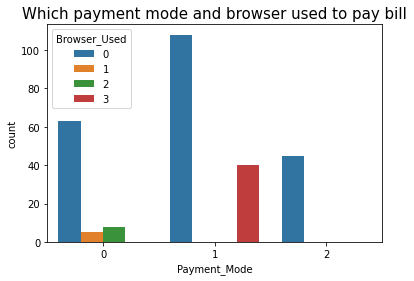

In [144]:
plt.title('Which payment mode and browser used to pay bill',fontsize=15)
sns.countplot('Payment_Mode',hue='Browser_Used',data=data);


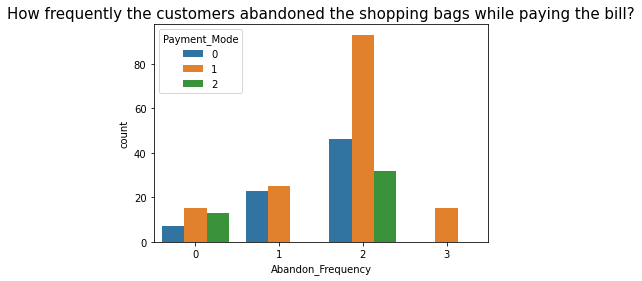

In [145]:

plt.title('How frequently the customers abandoned the shopping bags while paying the bill?',fontsize=15)
sns.countplot('Abandon_Frequency',hue='Payment_Mode',data=data);

Lets check the distribution of the columns having continious data

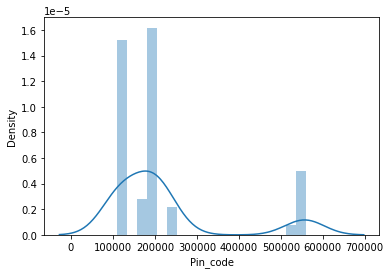

In [146]:
# now the data looks good and there is no missing values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

sns.distplot(data["Pin_code"])
plt.show()

The data appears to be normally distributed int he Pin_code column and we can observe a little skewness in the right side. Now lets find out the outliers by using box plots.

In [147]:
data.head()

Gender  Age  Shopping_City  Pin_code  Shopping_Since  Shopping_Frequency  \
0       1    1              2    110009               3                   2   
1       0    0              2    110030               3                   3   
2       0    0              4    201308               2                   3   
3       1    0              6    132001               2                   4   
4       0    0              0    530068               1                   0   

   Internet_Accessibility  Device_Used  Screen_Size  Operating_System  \
0                       0            0            3                 2   
1                       2            2            0                 1   
2                       1            2            2                 0   
3                       1            2            2                 1   
4                       2            2            0                 1   

   Browser_Used  Channel_First_Used  Login_Mode  Time_Explored  Payment_Mode  \
0             0                   2           2              2             2   
1             0                   2           4              4             1   
2             0                   2           4              1             2   
3             3                   2           2              2             1   
4             3                   0           4              4             1   

   Abandon_Frequency  Abandon_Reason  Content_Readability  \
0                  2               2                    0   
1                  3               4                    2   
2                  2               4                    2   
3                  1               0                    0   
4                  0               0                    2   

   Similar_Product_Info  Seller_Product_Info  Product_Info_Clarity  \
0                     2                    2                     0   
1                     3                    3                     2   
2                     0                    0                     0   
3                     0                    2                     0   
4                     2                    2                     0   

   Navigation_Ease  Loading_Processing_Speed  User_Friendly_Interface  \
0                0                         4                        1   
1                2                         3                        3   
2                0                         0                        3   
3                2                         0                        3   
4                0                         3                        3   

   Convenient_Payment_Mode  Timely_Fulfilment_Trust  \
0                        1                        1   
1                        2                        2   
2                        2                        2   
3                        2                        0   
4                        2                        0   

   Customer_Support_Response  Customer_Privacy_Guarantee  \
0                          1                           0   
1                          1                           1   
2                          1                           1   
3                          1                           1   
4                          1                           0   

   Various_Channel_Responses  Benefits  Enjoy  Convenience  \
0                          0         4      3            1   
1                          1         2      2            2   
2                          1         2      2            2   
3                          0         0      4            3   
4                          1         2      2            2   

   Return_Replacement_Policy  Loyalty_Programs_Access  Info_Satisfaction  \
0                          1                        0                  2   
1                          2                        2                  1   
2                          2                        2                  1   
3           

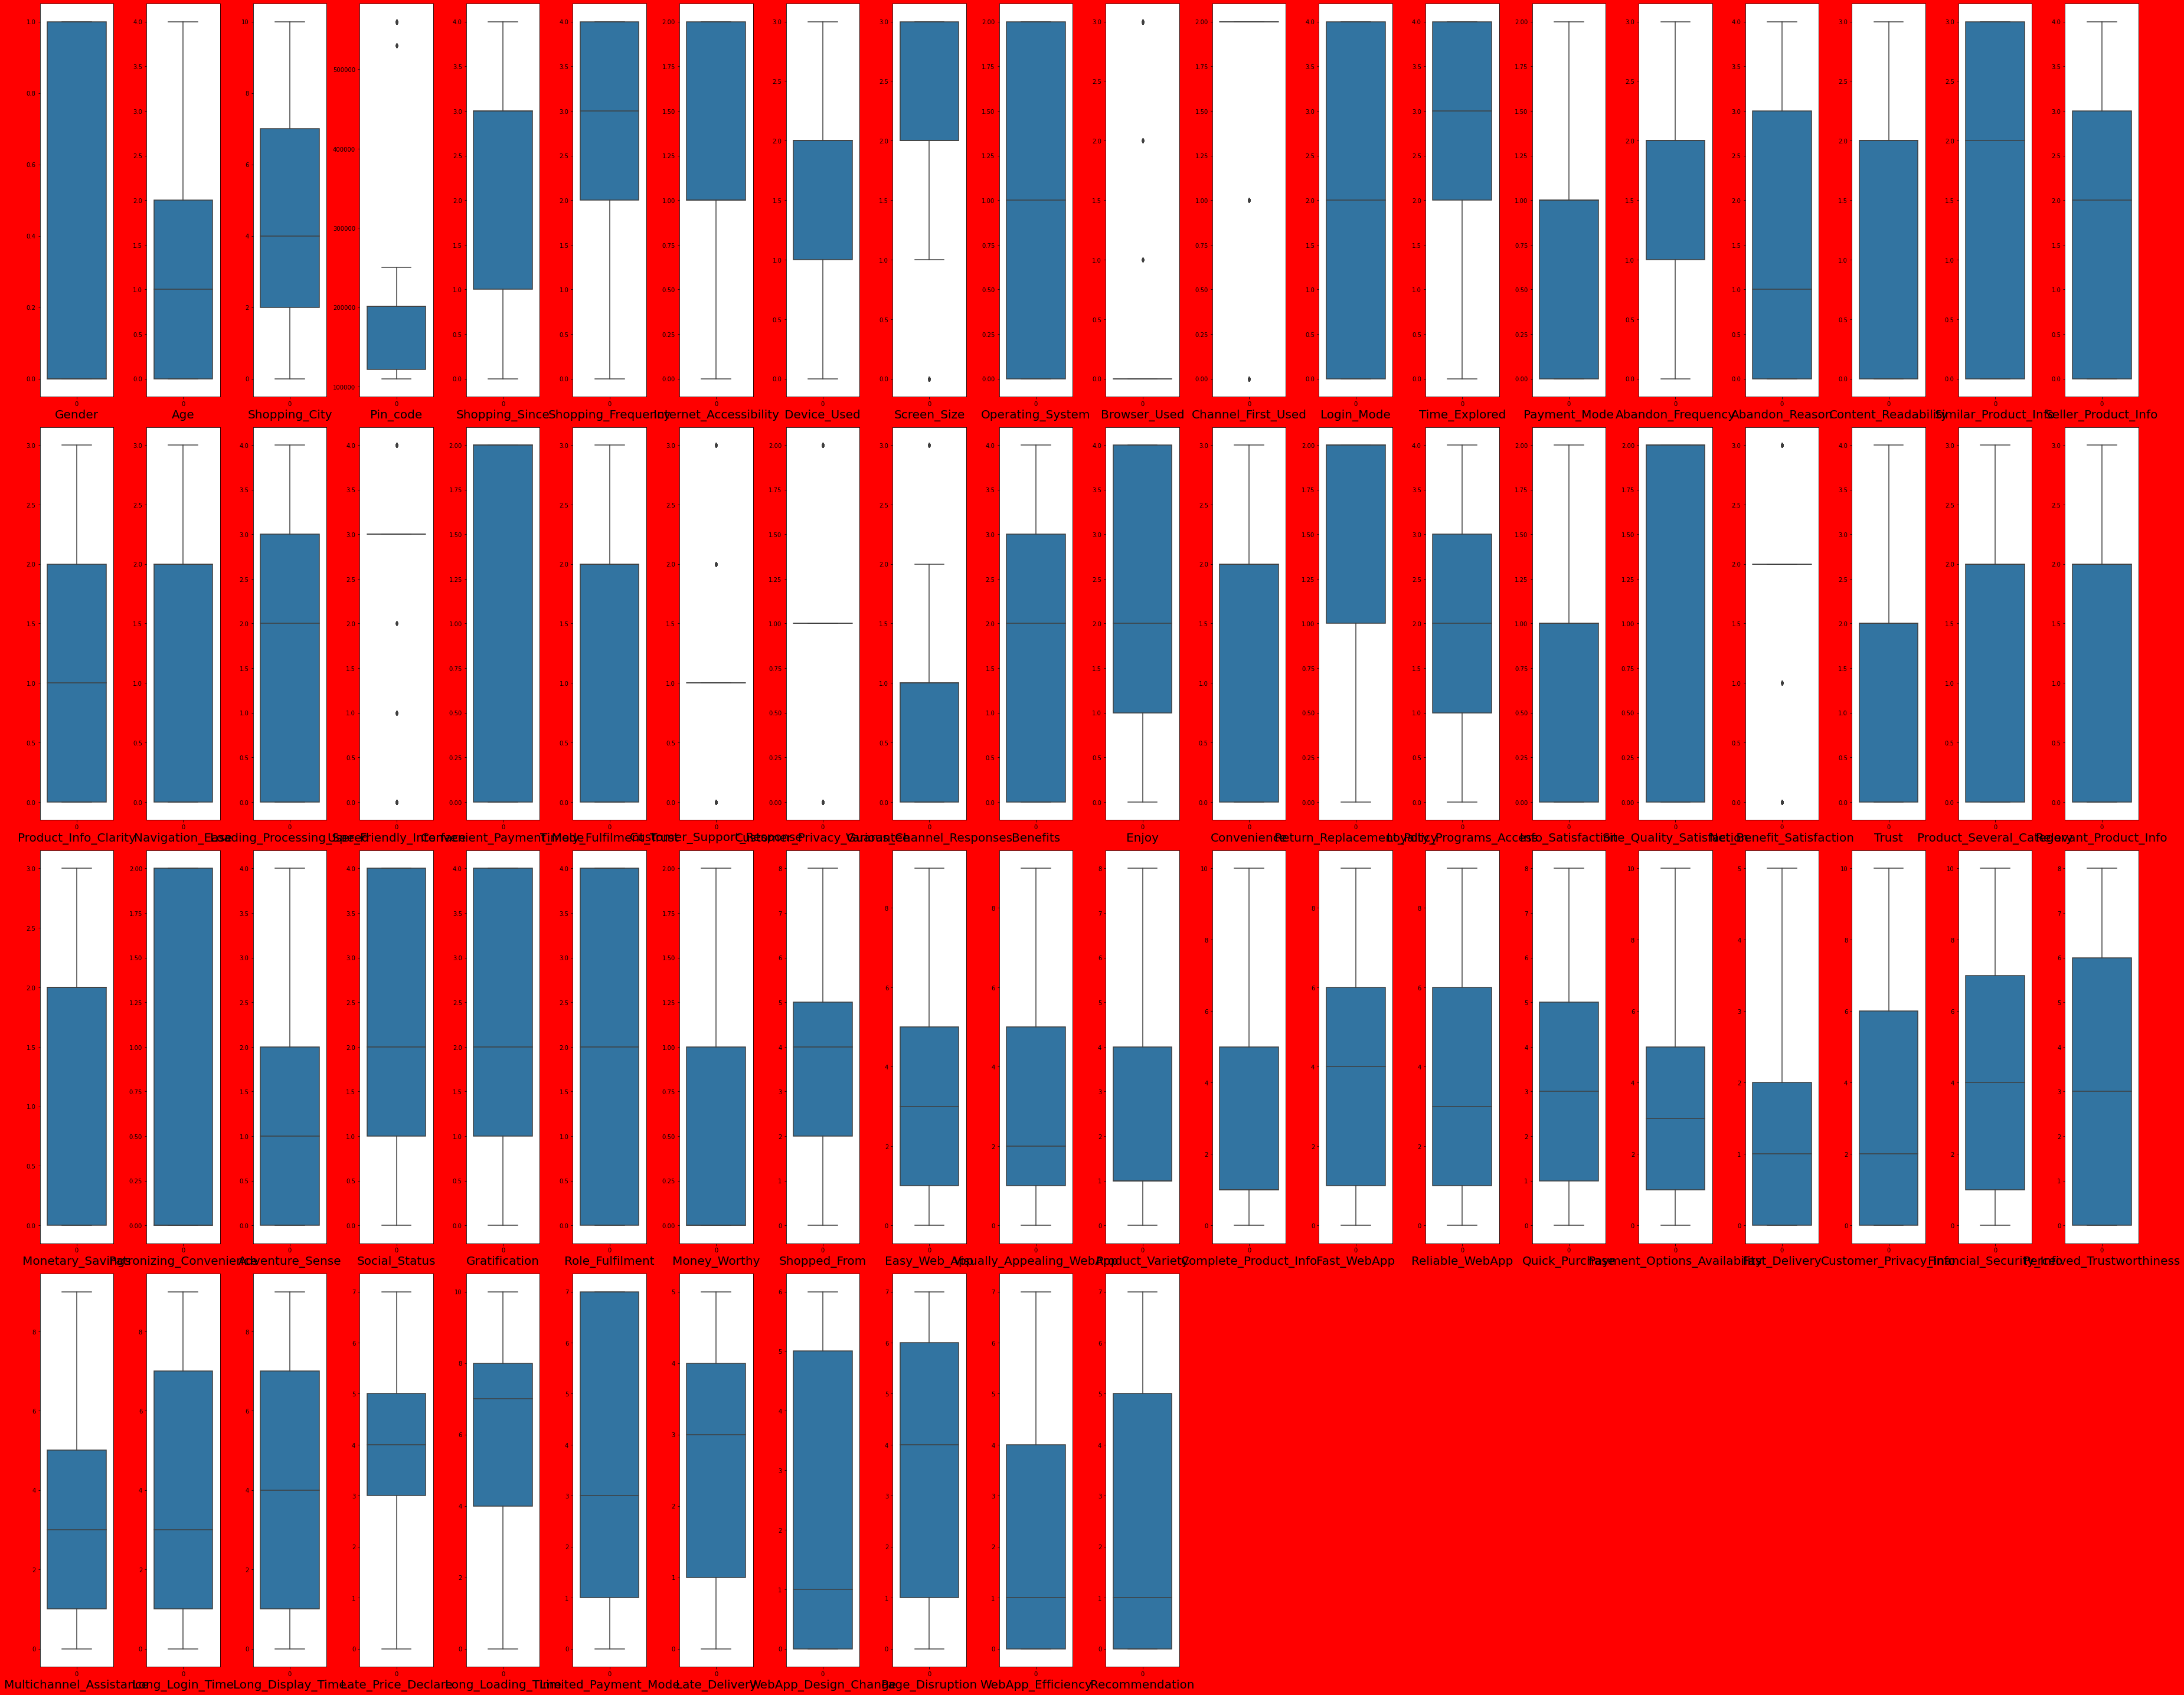

In [148]:
# checking for the outliers by ploting box plots

plt.figure(figsize=(50,40), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=71:
        plt.subplot(4,20,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Pincode has some outliers we need to remove the outliers, But for rest of the catagorical columns we will keep the outliers as it is.


In [149]:
#assigning our datset to a new variable for testing the feasibility after removing the outliers
df=data

In [150]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

Gender                              1.0
Age                                 2.0
Shopping_City                       5.0
Pin_code                        79292.0
Shopping_Since                      2.0
Shopping_Frequency                  2.0
Internet_Accessibility              1.0
Device_Used                         1.0
Screen_Size                         1.0
Operating_System                    2.0
Browser_Used                        0.0
Channel_First_Used                  0.0
Login_Mode                          4.0
Time_Explored                       2.0
Payment_Mode                        1.0
Abandon_Frequency                   1.0
Abandon_Reason                      3.0
Content_Readability                 2.0
Similar_Product_Info                3.0
Seller_Product_Info                 3.0
Product_Info_Clarity                2.0
Navigation_Ease                     2.0
Loading_Processing_Speed            3.0
User_Friendly_Interface             0.0
Convenient_Payment_Mode             2.0


In [151]:
#removing the outliers for Pin_code
pc_high=q3.Pin_code + (1.5 * iqr.Pin_code)


index=np.where(df['Pin_code'] > pc_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(232, 71)


index  Gender  Age  Shopping_City  Pin_code  Shopping_Since  \
0        0       1    1              2    110009               3   
1        1       0    0              2    110030               3   
2        2       0    0              4    201308               2   
3        3       1    0              6    132001               2   
4        5       0    1              9    201308               3   
5        6       1    2              2    110011               3   
6        7       1    2              2    110018               2   
7        8       0    4             10    173229               1   
8        9       0    1              2    110039               4   
9       10       1    1              8    244001               3   
10      11       0    2              9    201308               3   
11      12       0    3              5    122018               1   
12      13       0    1              4    201310               3   
13      14       0    0              6    132001               4   
14      16       1    1              9    201308               0   
15      17       1    2              2    110011               4   
16      18       0    2              2    110018               0   
17      19       0    0             10    173229               0   
18      20       0    0              9    201308               0   
19      21       1    1              5    122018               2   
20      22       1    2              4    201310               3   
21      23       0    2              4    203207               3   
22      24       0    0              7    250001               2   
23      26       1    0              3    201005               4   
24      27       1    1              2    110044               3   
25      28       0    2              4    201306               3   
26      29       0    2              6    132001               1   
27      31       1    1              9    201305               1   
28      32       1    1              2    110042               3   
29      33       0    2              4    201308               3   
30      34       0    3              6    132036               2   
31      36       1    1              9    201305               4   
32      37       1    2              2    110008               3   
33      38       0    2              4    201308               3   
34      39       0    0              6    132036               1   
35      41       1    1              9    201303               2   
36      42       1    0              2    110044               1   
37      43       0    0              4    201312               4   
38      44       0    1              7    250001               3   
39      46       1    2              9    201308               3   
40      47       1    4              2    110011               3   
41      48       0    1              4    203202               1   
42      49       0    1              6    132001               3   
43      51       1    3              9    201304               1   
44      52       1    2              2    110044               4   
45      53       0    2              4    201312               3   
46      54       0    0              7    250001               3   
47      56       1    0              9    201310               1   
48      57       1    0              2    110044               4   
49      58       0    1              4    201306               3   
50      59       0    2              6    132001               3   
51      61       1    4              9    201308               1   
52      62       1    1              2    110014               4   
53      63       0    1              4    201310               3   
54      64       0    2              7    250001               1   
55      66       1    1              9    201304               2   
56      67       1    2              2    110044               1   
57      68       0    2              4    201312             

In [152]:
data=df

In [153]:
data.shape

(232, 71)

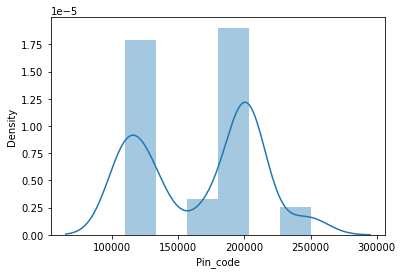

In [154]:
#checking the distribution of Pin_code after removing the outliers
sns.distplot(data["Pin_code"])
plt.show()

the distribution looks little bit better than before removing the outliers.

Now lets check the correlation among the features(multicolinierity)

In [155]:
#finding the corelation between the features in the data set
data.corr()

Gender       Age  Shopping_City  Pin_code  \
Gender                        1.000000  0.048932      -0.047285 -0.217051   
Age                           0.048932  1.000000       0.066757 -0.063737   
Shopping_City                -0.047285  0.066757       1.000000  0.502607   
Pin_code                     -0.217051 -0.063737       0.502607  1.000000   
Shopping_Since               -0.122845 -0.119878      -0.230181 -0.085614   
Shopping_Frequency           -0.024250  0.284435       0.063008 -0.306467   
Internet_Accessibility       -0.383177  0.281308       0.025934 -0.118551   
Device_Used                   0.049402  0.059700       0.020943  0.016476   
Screen_Size                  -0.011343 -0.073781       0.080901  0.126744   
Operating_System              0.005531 -0.084156      -0.085307 -0.102719   
Browser_Used                  0.114896 -0.191970       0.032330 -0.127408   
Channel_First_Used           -0.124475  0.094937      -0.039841  0.087006   
Login_Mode                   -0.151706 -0.078760      -0.162751  0.014293   
Time_Explored                 0.027409 -0.238796      -0.149614 -0.272635   
Payment_Mode                  0.117768 -0.156392      -0.005182  0.099076   
Abandon_Frequency             0.129106  0.034536      -0.136715 -0.082864   
Abandon_Reason                0.082056  0.153258      -0.075663 -0.039695   
Content_Readability          -0.213577  0.178502       0.046537  0.223410   
Similar_Product_Info         -0.188496 -0.221519      -0.157832 -0.090703   
Seller_Product_Info          -0.171137  0.225726      -0.072494 -0.014076   
Product_Info_Clarity         -0.068580  0.037874      -0.195607  0.067662   
Navigation_Ease              -0.122131 -0.179977      -0.318954 -0.210970   
Loading_Processing_Speed     -0.040322 -0.087927      -0.128716 -0.012681   
User_Friendly_Interface      -0.282605  0.019684      -0.261791 -0.112489   
Convenient_Payment_Mode      -0.235548  0.121407      -0.027889  0.039731   
Timely_Fulfilment_Trust      -0.201600  0.244676      -0.081275  0.196230   
Customer_Support_Response    -0.142233  0.120635      -0.004631  0.034110   
Customer_Privacy_Guarantee   -0.107395  0.040592      -0.026374  0.105490   
Various_Channel_Responses    -0.341453  0.028895      -0.153419 -0.008432   
Benefits                     -0.024669 -0.044803       0.035764  0.073572   
Enjoy                         0.144169 -0.145653       0.040642  0.108052   
Convenience                   0.003603 -0.115213      -0.039594 -0.029720   
Return_Replacement_Policy    -0.102049 -0.151596      -0.144807  0.051066   
Loyalty_Programs_Access       0.067028 -0.086950      -0.046314  0.069668   
Info_Satisfaction             0.234079 -0.131595       0.132025  0.083533   
Site_Quality_Satisfaction    -0.214742  0.139963      -0.036293  0.108879   
Net_Benefit_Satisfaction     -0.261294 -0.052583      -0.035312 -0.050372   
Trust                         0.054040  0.173458      -0.013803  0.127866   
Product_Several_Category     -0.050271  0.139285       0.142545  0.204041   
Relevant_Product_Info         0.011162 -0.112854      -0.147198 -0.070568   
Monetary_Savings             -0.109284 -0.100336      -0.195587 -0.013809   
Patronizing_Convenience       0.167264 -0.036408      -0.027426 -0.009486   
Adventure_Sense              -0.006762  0.071733      -0.240917 -0.168583   
Social_Status                 0.003942  0.176035      -0.061582 -0.186931   
Gratification                -0.252764  0.210725       0.014350  0.074283   
Role_Fulfilment              -0.063915 -0.187381      -0.276489 -0.109459   
Money_Worthy                  0.104487  0.091572       0.298978  0.175290   
Shopped_From                  0.112928 -0.062101       0.102181  0.174379   
Easy_Web_App                  0.096767  0.001261       0.023473  0.154281   
Visually_Appealing_WebApp     0.065397 -0.007501      -0.000267 -0.013676   
Product_Variety               0.049138  0.143856      -0.009040  0.015192   
Complete_Product_Info       

<AxesSubplot:>

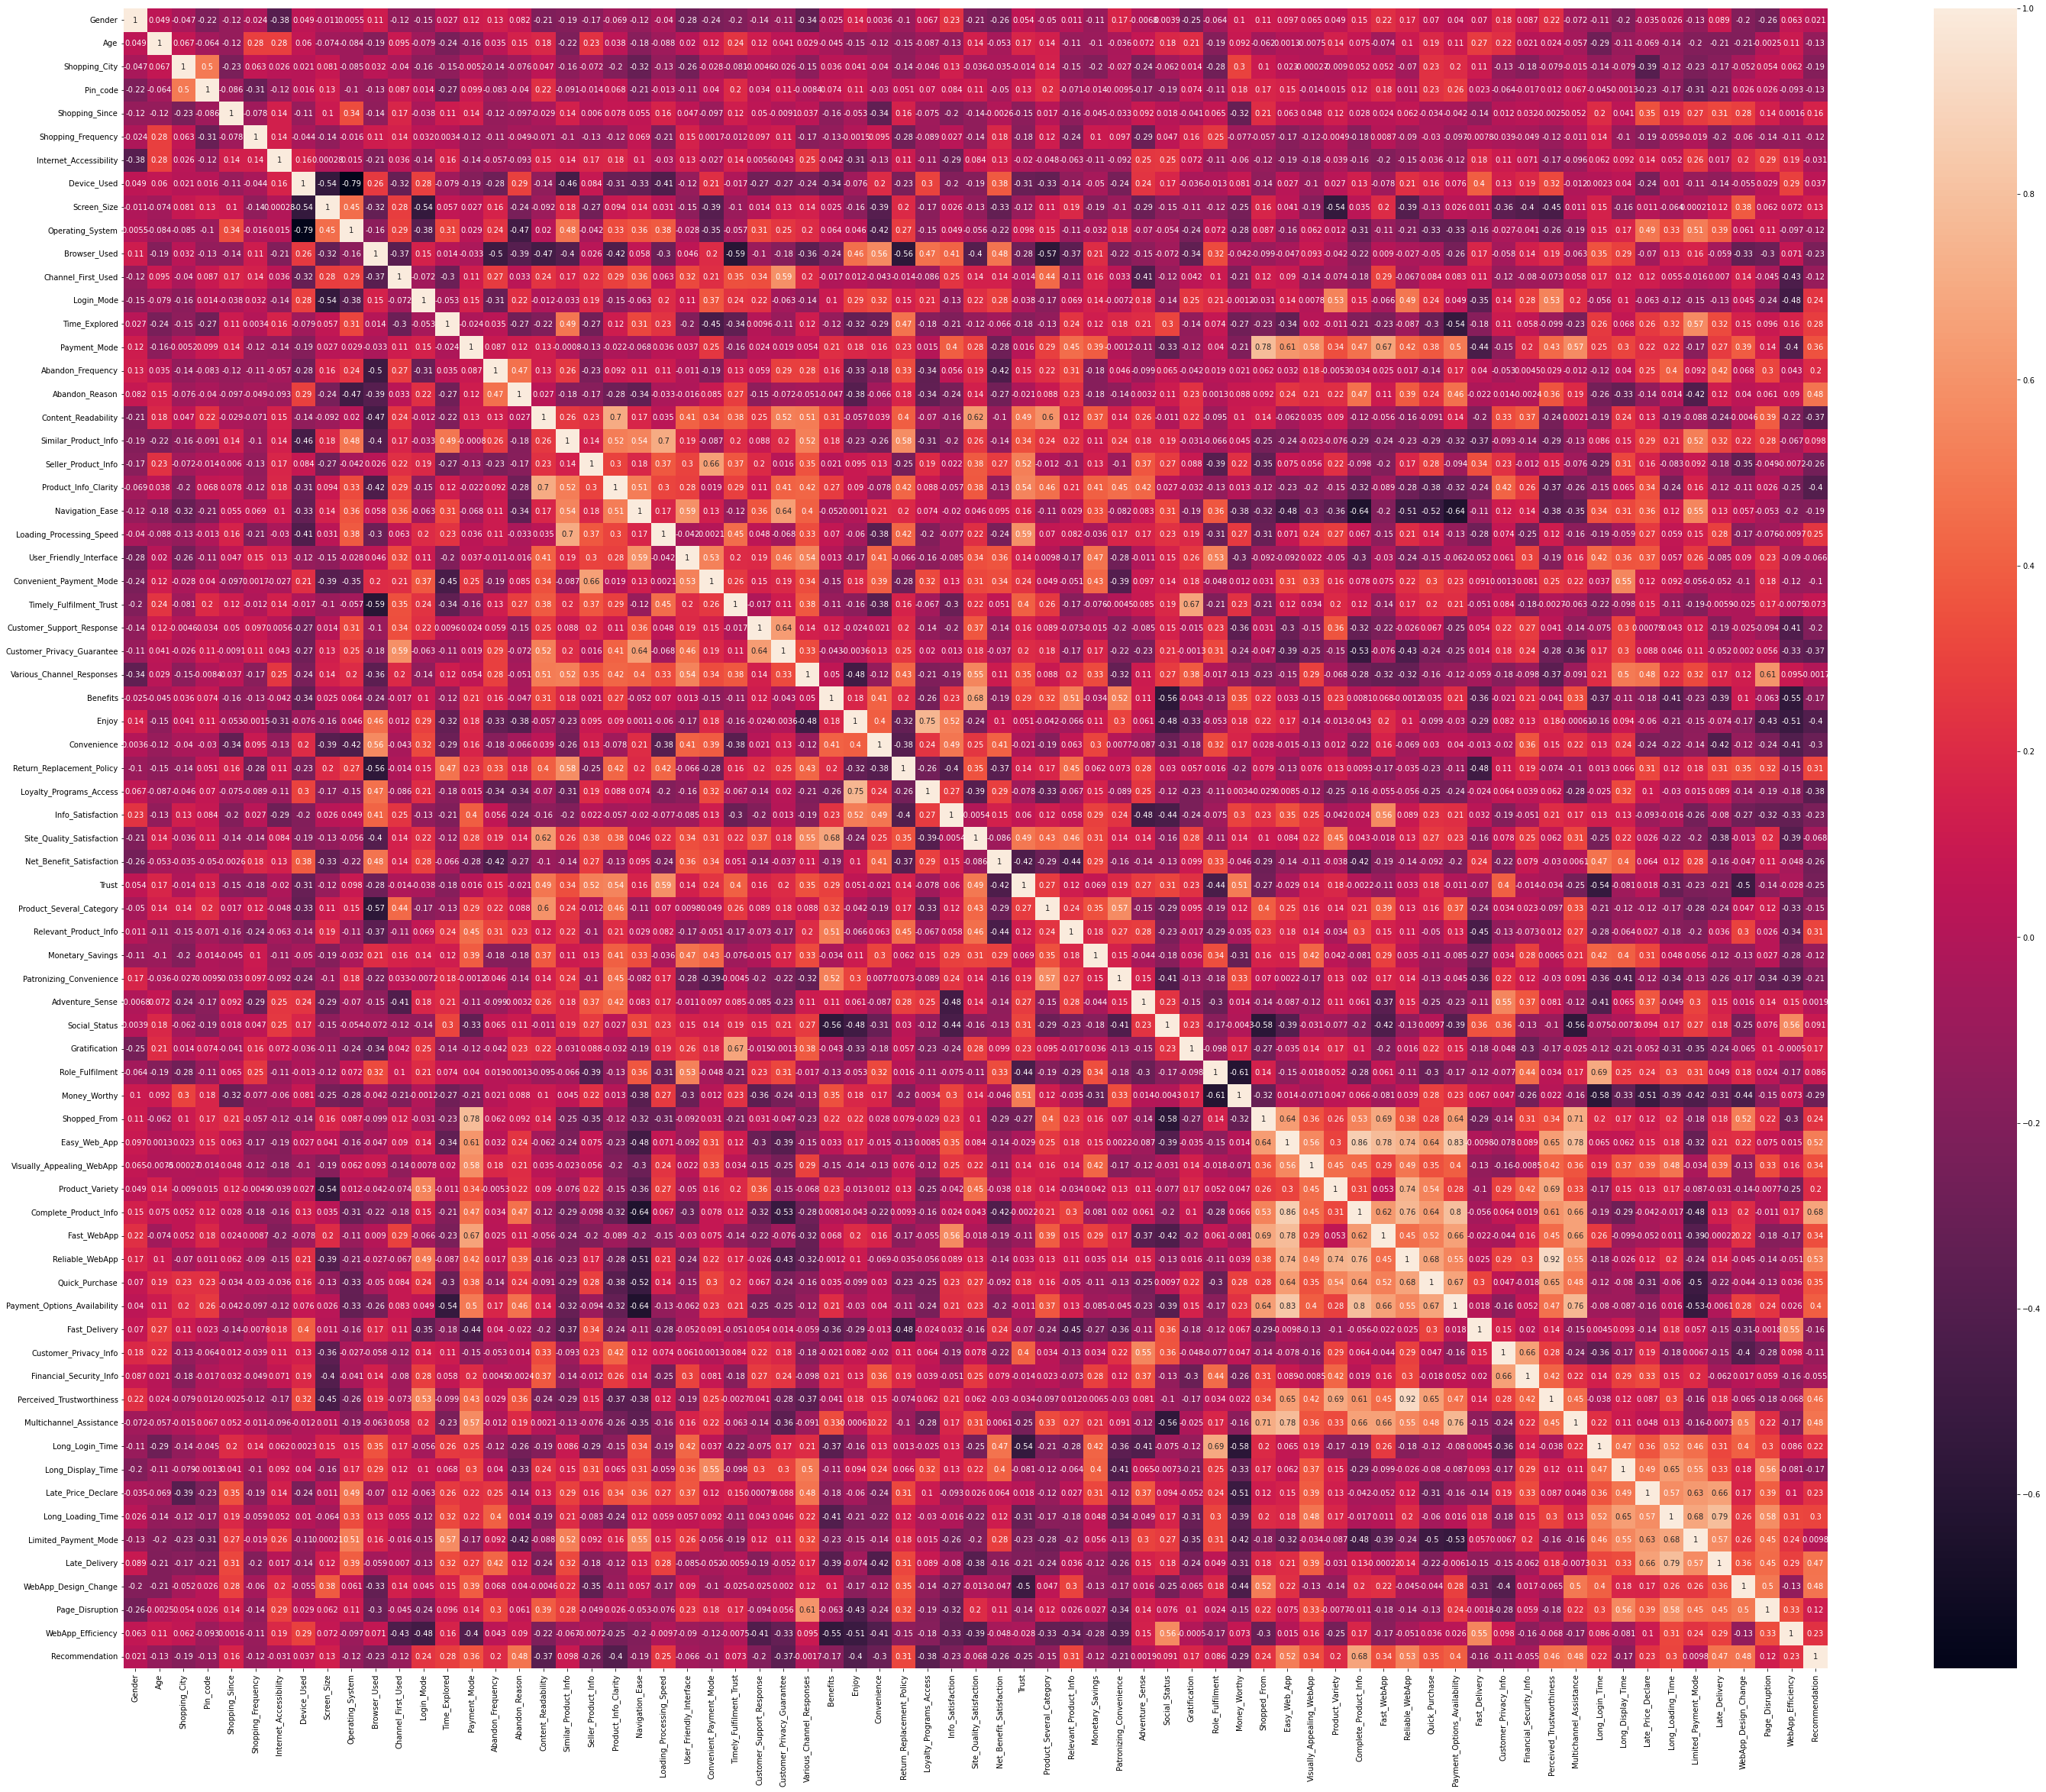

In [156]:
#now lets find out the co relation using heatmap plot for a better understanding.
plt.figure(figsize=(50,40))
sns.heatmap(data.corr(),annot=True)

We can see there are some features having very good colinearity among each other but this is not not good for the model. lets Find out the VIF(variance inflation factor) scores for each factor to find more about multicolinearity.

In [157]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(data)

In [158]:
x_scaled.shape[1]

71

Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [159]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=data.columns

vif

VIF                      Features
0    2.773652                        Gender
1    1.853678                           Age
2    2.753899                 Shopping_City
3    3.063231                      Pin_code
4    2.240240                Shopping_Since
5    2.413503            Shopping_Frequency
6    2.688888        Internet_Accessibility
7   35.808590                   Device_Used
8   21.703059                   Screen_Size
9   34.707684              Operating_System
10        inf                  Browser_Used
11        inf            Channel_First_Used
12        inf                    Login_Mode
13        inf                 Time_Explored
14        inf                  Payment_Mode
15        inf             Abandon_Frequency
16        inf                Abandon_Reason
17        inf           Content_Readability
18        inf          Similar_Product_Info
19        inf           Seller_Product_Info
20        inf          Product_Info_Clarity
21        inf               Navigation_Ease
22        inf      Loading_Processing_Speed
23        inf       User_Friendly_Interface
24        inf       Convenient_Payment_Mode
25        inf       Timely_Fulfilment_Trust
26        inf     Customer_Support_Response
27        inf    Customer_Privacy_Guarantee
28        inf     Various_Channel_Responses
29        inf                      Benefits
30        inf                         Enjoy
31        inf                   Convenience
32        inf     Return_Replacement_Policy
33        inf       Loyalty_Programs_Access
34        inf             Info_Satisfaction
35        inf     Site_Quality_Satisfaction
36        inf      Net_Benefit_Satisfaction
37        inf                         Trust
38        inf      Product_Several_Category
39        inf         Relevant_Product_Info
40        inf              Monetary_Savings
41        inf       Patronizing_Convenience
42        inf               Adventure_Sense
43        inf                 Social_Status
44        inf                 Gratification
45        inf               Role_Fulfilment
46        inf                  Money_Worthy
47        inf                  Shopped_From
48        inf                  Easy_Web_App
49        inf     Visually_Appealing_WebApp
50        inf               Product_Variety
51        inf         Complete_Product_Info
52        inf                   Fast_WebApp
53        inf               Reliable_WebApp
54        inf                Quick_Purchase
55        inf  Payment_Options_Availability
56        inf                 Fast_Delivery
57        inf         Customer_Privacy_Info
58        inf       Financial_Security_Info
59        inf     Perceived_Trustworthiness
60        inf       Multichannel_Assistance
61        inf               Long_Login_Time
62        inf             Long_Display_Time
63        inf            Late_Price_Declare
64        inf             Long_Loading_Time
65        inf          Limited_Payment_Mode
66        inf                 Late_Delivery
67        inf          WebApp_Design_Change
68        inf               Page_Disruption
69        inf             WebApp_Efficiency
70        inf                Recommendation

Device_used, Screen Size and Operating system have high vif values whicha re greater than 10 so they are highly multicolinear.

Also some features like gender, age, shoping city Pincode etc are moderately multicolinear.

Maximum Features have Vif= inf which means the features are perfect corelation with other features.

# Conclusions from the data Analysis


This study was performed to find out about the influencing factors towards online shopping from different e-commerce websites.

In this customer retention project during the Exploratory Data Analysis(EDA), in data cleaning part I have replaced the duplicate values in different columns. I have found no null values. i have also renamed the columns as their original named were way too big. I have also encoded the catagorical values in all the columns by using label encoder. I have Visualized the data using count plot, box plot and dist plot.I have also Checked the statistics of the data for columnshaving continious values and also checked for skewness, outliers and correlation between the features. I have also removed the outliers by using IQR.

From the analysis it was observed that consumers purchasing decisions are dependent on various factors including both on the combination of both utilitarian value and hedonistic values. All these factors influence consumers to purchase products  online from e-commerce websites. According to consumers' opinions, "time saving" is the most important influencing factors for shopping online from e-commerce websites.

Again "information availability", "open 24/7", "huge range of products/ brands", "reasonable prices", "various offers for online products", "easy ordering system", and "shopping fun" are other infuencing factors for shopping online. Also, "online payment system", "personal privacy or security issues", "delaying of delivery" and "lacks of personal customer service" are the main inhibitions of online shopping to the customers.

After the Visualization of the data with proper visualization techniques I found out that Amazon is the best online store where the customers trust on buying products and it has positive impact on the customers. 

It was also concluded that online shopping is not trustworthy and reliable to some customers due to only online payment system and personal privacy. In addition, online security is a major concern for the consumer particularly in terms of fraud, privacy and hacking.